## 1. ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò Î∞è Î∂àÎü¨Ïò§Í∏∞  
YOLO Î™®Îç∏ÏùÑ Ïã§ÌñâÌïòÍ∏∞ ÏúÑÌïú ÌôòÍ≤ΩÏùÑ Íµ¨ÏÑ±ÌïòÎäî ÏΩîÎìúÏûÖÎãàÎã§.  
ÌïÑÏöîÌïú Ìå®ÌÇ§ÏßÄÎ•º ÏÑ§ÏπòÌïòÍ≥†, Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Î∞è Îç∞Ïù¥ÌÑ∞ Î°úÎî©Ïóê ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨ÏòµÎãàÎã§.

> ‚úÖ ÏÑ§Ïπò Ìå®ÌÇ§ÏßÄ
- `ultralytics`: YOLO Î™®Îç∏ Ïã§Ìñâ Î∞è ÌïôÏäµ
- `opencv-python`: Ïù¥ÎØ∏ÏßÄ Î°úÎî© Î∞è Ï†ÑÏ≤òÎ¶¨
- `numpy`, `matplotlib`: Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ Î∞è ÏãúÍ∞ÅÌôî

> ‚úÖ Î∂àÎü¨Ïò§Îäî ÌïµÏã¨ ÎùºÏù¥Î∏åÎü¨Î¶¨
- `torch`, `torchvision`: Î™®Îç∏ ÌïôÏäµ Î∞è Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
- `ultralytics.YOLO`: YOLO Î™®Îç∏ Î°úÎî©
- `cv2`, `numpy`: Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Î∞è ÏàòÏπò Í≥ÑÏÇ∞
- `tqdm`, `matplotlib.pyplot`: ÏãúÍ∞ÅÌôî Î∞è ÏßÑÌñâ ÌëúÏãú

In [45]:
import os
import cv2
import torch
import yaml
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from glob import glob
from ultralytics import YOLO
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [46]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

## 2. ÎûúÎç§ ÏãúÎìú Í≥†Ï†ï

Ïã§ÌóòÏùò ÏùºÍ¥ÄÏÑ±ÏùÑ Ïú†ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ `random`, `numpy`, `torch`Ïùò ÏãúÎìúÎ•º Í≥†Ï†ïÌï©ÎãàÎã§.  

In [47]:
def seed_everything(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
seed_everything()

## 3. Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú ÏÑ§Ï†ï Î∞è YAML ÌååÏùº Î°úÎìú
`data.yaml` ÌååÏùºÏùÑ Î∂àÎü¨ÏôÄ ÌïôÏäµ(train), Í≤ÄÏ¶ù(val) Îç∞Ïù¥ÌÑ∞Ïùò Í≤ΩÎ°úÎ•º ÏÑ§Ï†ïÌï©ÎãàÎã§.

> ‚úÖ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Îäî Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§Îäî Îç∞ ÏÇ¨Ïö©ÎêòÎ©∞,  
> ‚úÖ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Îäî ÌïôÏäµ Ï§ë Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïòÍ≥† Í≥ºÏ†ÅÌï© Ïó¨Î∂ÄÎ•º ÌôïÏù∏ÌïòÎäî Îç∞ ÏÇ¨Ïö©Îê©ÎãàÎã§.

In [49]:
DATA_YAML_PATH = "C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole-detection-challenge/SSAFY_AI_CHALLENGE/data.yaml"

with open(DATA_YAML_PATH, "r", encoding="utf-8") as f:
    data_yaml = yaml.safe_load(f)

DATASET_PATH = os.path.dirname(DATA_YAML_PATH)
TRAIN_IMAGES = os.path.join(DATASET_PATH, data_yaml["train"].replace("../", ""))
VALID_IMAGES = os.path.join(DATASET_PATH, data_yaml["val"].replace("../", ""))

print(DATASET_PATH)
print(TRAIN_IMAGES)
print(VALID_IMAGES)

C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole-detection-challenge/SSAFY_AI_CHALLENGE
C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole-detection-challenge/SSAFY_AI_CHALLENGE/new_train/images
C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole-detection-challenge/SSAFY_AI_CHALLENGE/valid/images


## 4. Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¥ÎûòÏä§ Ï†ïÏùò Î∞è Î°úÎìú  
Í∞ùÏ≤¥ ÌÉêÏßÄ Î™®Îç∏ÏùÑ ÏúÑÌïú Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Î∂àÎü¨Ïò§Îäî Í≥ºÏ†ïÏûÖÎãàÎã§.  
OpenCVÏôÄ globÏùÑ ÌôúÏö©ÌïòÏó¨ Ïù¥ÎØ∏ÏßÄÎ•º Î°úÎìúÌïòÍ≥†, torchvision.transformsÎ•º Ï†ÅÏö©Ìï¥  
ÌÅ¨Í∏∞ Î≥ÄÌôò Î∞è ÌÖêÏÑú Î≥ÄÌôòÏùÑ ÏàòÌñâÌï©ÎãàÎã§.  
ÎßàÏßÄÎßâÏúºÎ°ú ÏÉòÌîå Ïù¥ÎØ∏ÏßÄÎ•º ÏãúÍ∞ÅÌôîÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Í∞Ä Ïò¨Î∞îÎ•¥Í≤å Î∂àÎü¨ÏôÄÏ°åÎäîÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§.

ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå


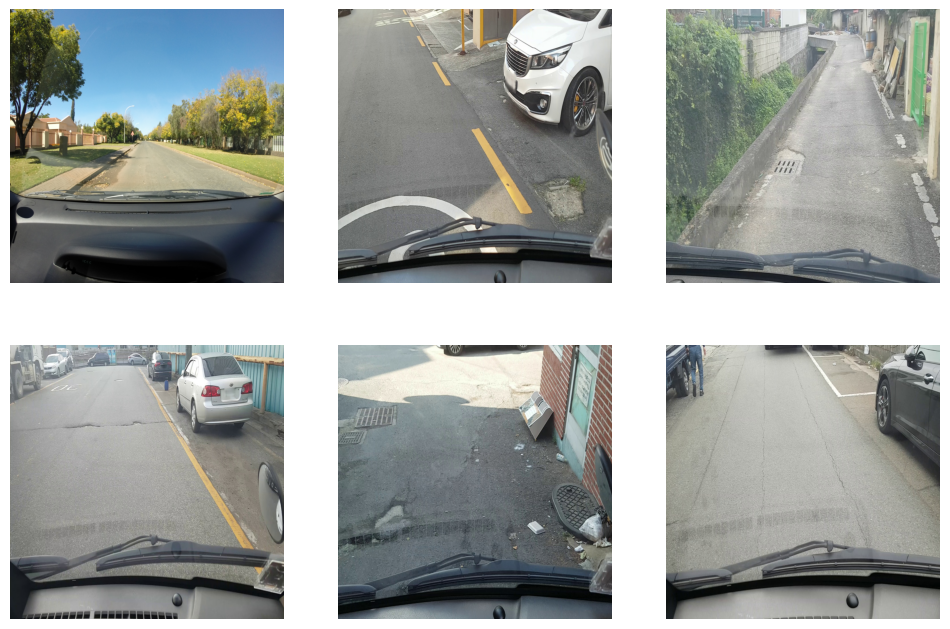

In [50]:
class PotholeDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_paths = glob(os.path.join(image_dir, "*.jpg"))
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = cv2.imread(self.image_paths[idx])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        return self.transform(img) if self.transform else img


transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((1024, 1024)),
    transforms.ToTensor(),
])

train_loader = DataLoader(PotholeDataset(TRAIN_IMAGES, transform), batch_size=16, shuffle=True)
valid_loader = DataLoader(PotholeDataset(VALID_IMAGES, transform), batch_size=16, shuffle=False)


def show_sample_images(image_loader):
    sample_images = next(iter(image_loader))

    fig, ax = plt.subplots(2, 3, figsize=(12, 8))

    for i, img in enumerate(sample_images[:6]):
        ax[i // 3, i % 3].imshow(img.permute(1, 2, 0).numpy())
        ax[i // 3, i % 3].axis("off")

    plt.show()


print("ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå")
show_sample_images(train_loader)

In [7]:
IMAGE_DIR = "C:/Users/User/Downloads/pothole-detection-challenge/train/images"


In [53]:
from glob import glob
import os

IMAGE_DIR = "C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole-detection-challenge/SSAFY_AI_CHALLENGE/new_train/images"
IMAGE_PATHS = sorted(glob(os.path.join(IMAGE_DIR, "*.jpg")))
print("Ï∞æÏùÄ Ïù¥ÎØ∏ÏßÄ Ïàò:", len(IMAGE_PATHS))


Ï∞æÏùÄ Ïù¥ÎØ∏ÏßÄ Ïàò: 25713


In [54]:
import os
from glob import glob
import random
import cv2

IMAGE_DIR = "C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole-detection-challenge/SSAFY_AI_CHALLENGE/new_train/images"
IMAGE_PATHS = sorted(glob(os.path.join(IMAGE_DIR, "*.jpg")))

print("Ï¥ù Ïù¥ÎØ∏ÏßÄ Ïàò:", len(IMAGE_PATHS))
print("ÏòàÏãú Í≤ΩÎ°ú:", IMAGE_PATHS[:5])

# ÏóêÎü¨ Î∞©ÏßÄÏö©
if not IMAGE_PATHS:
    raise ValueError("üìõ Ïù¥ÎØ∏ÏßÄ Î¶¨Ïä§Ìä∏Í∞Ä ÎπÑÏñ¥ ÏûàÏùå! Í≤ΩÎ°ú ÌôïÏù∏ ÌïÑÏöî")

# ÎûúÎç§ Ïù¥ÎØ∏ÏßÄ ÏÑ†ÌÉù
IMG_PATH = random.choice(IMAGE_PATHS)
LABEL_PATH = IMG_PATH.replace("images", "labels").replace(".jpg", ".txt")

# Ïù¥ÎØ∏ÏßÄ Î°úÎî© ÏãúÎèÑ
img = cv2.imread(IMG_PATH)
if img is None:
    raise ValueError(f"üìõ Ïù¥ÎØ∏ÏßÄ Î°úÎî© Ïã§Ìå®: {IMG_PATH}")
else:
    print("‚úÖ Ïù¥ÎØ∏ÏßÄ Î°úÎî© ÏÑ±Í≥µ:", IMG_PATH)


Ï¥ù Ïù¥ÎØ∏ÏßÄ Ïàò: 25713
ÏòàÏãú Í≤ΩÎ°ú: ['C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole-detection-challenge/SSAFY_AI_CHALLENGE/new_train/images\\AM_rainny_CI01_20211021_092326_399_1.jpg', 'C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole-detection-challenge/SSAFY_AI_CHALLENGE/new_train/images\\AM_rainny_CI01_20211021_092326_399_2.jpg', 'C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole-detection-challenge/SSAFY_AI_CHALLENGE/new_train/images\\AM_rainny_CI01_20211021_092326_399_3.jpg', 'C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole-detection-challenge/SSAFY_AI_CHALLENGE/new_train/images\\AM_rainny_CI01_20211021_092326_400_2.jpg', 'C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole-detection-challenge/SSAFY_AI_CHALLENGE/new_train/images\\AM_rainny_CI01_20211021_092326_400_3.jpg']
‚úÖ Ïù¥ÎØ∏ÏßÄ Î°úÎî© ÏÑ±Í≥µ: C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole-detection-challenge/SSAFY_AI_CHALLENGE/new_train/images\AM_sunny_CI02_20211020_100610_731_1.jpg


In [55]:
print("Ï¥ù Ïù¥ÎØ∏ÏßÄ Ïàò:", len(IMAGE_PATHS))
print("ÏòàÏãú Í≤ΩÎ°ú:", IMAGE_PATHS[:5])


Ï¥ù Ïù¥ÎØ∏ÏßÄ Ïàò: 25713
ÏòàÏãú Í≤ΩÎ°ú: ['C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole-detection-challenge/SSAFY_AI_CHALLENGE/new_train/images\\AM_rainny_CI01_20211021_092326_399_1.jpg', 'C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole-detection-challenge/SSAFY_AI_CHALLENGE/new_train/images\\AM_rainny_CI01_20211021_092326_399_2.jpg', 'C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole-detection-challenge/SSAFY_AI_CHALLENGE/new_train/images\\AM_rainny_CI01_20211021_092326_399_3.jpg', 'C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole-detection-challenge/SSAFY_AI_CHALLENGE/new_train/images\\AM_rainny_CI01_20211021_092326_400_2.jpg', 'C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole-detection-challenge/SSAFY_AI_CHALLENGE/new_train/images\\AM_rainny_CI01_20211021_092326_400_3.jpg']


## 5. ÎûúÎç§ ÏÉòÌîå ÏãúÍ∞ÅÌôî (Ïù¥ÎØ∏ÏßÄ + ÎùºÎ≤®)

ÌïôÏäµ Ïù¥ÎØ∏ÏßÄ Ï§ë ÌïòÎÇòÎ•º ÎûúÎç§ÏúºÎ°ú ÏÑ†ÌÉùÌïòÏó¨ Ìï¥Îãπ Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤® Ï†ïÎ≥¥Î•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.  
ÎùºÎ≤®ÏùÄ YOLO Ìè¨Îß∑Ïùò Ï¢åÌëú Ï†ïÎ≥¥Î•º Î∞îÌÉïÏúºÎ°ú Ïù¥ÎØ∏ÏßÄ ÏúÑÏóê Î∞îÏö¥Îî© Î∞ïÏä§Î•º Í∑∏Î†§ ÌôïÏù∏Ìï©ÎãàÎã§.


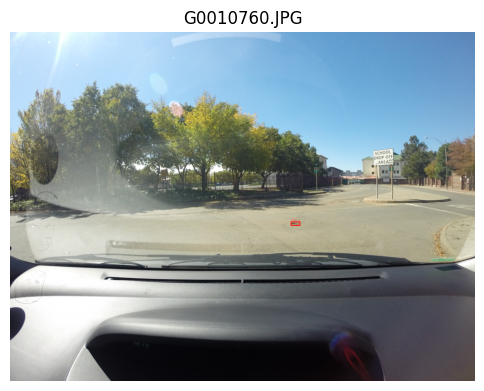

In [70]:
import os
import cv2
import random
from glob import glob
import matplotlib.pyplot as plt

# Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú Í∞ÄÏ†∏Ïò§Í∏∞ (ÌôïÏû•Ïûê ÎåÄÏÜåÎ¨∏Ïûê Íµ¨Î∂Ñ ÏóÜÏù¥)
IMAGE_PATHS = glob("C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole-detection-challenge/SSAFY_AI_CHALLENGE/train2/images/*.[jJ][pP][gG]")

IMG_PATH = random.choice(IMAGE_PATHS)
LABEL_PATH = IMG_PATH.replace("images", "labels").replace(".jpg", ".txt").replace(".JPG", ".txt")

img = cv2.imread(IMG_PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img.shape

if os.path.exists(LABEL_PATH):
    with open(LABEL_PATH, "r") as f:
        for line in f.readlines():
            cls, cx, cy, bw, bh = map(float, line.strip().split())
            x1 = int((cx - bw / 2) * w)
            y1 = int((cy - bh / 2) * h)
            x2 = int((cx + bw / 2) * w)
            y2 = int((cy + bh / 2) * h)
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 5)
            cv2.putText(img, f"Class {int(cls)}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 1)
else:
    print("ÎùºÎ≤® ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§:", LABEL_PATH)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis("off")
plt.title(os.path.basename(IMG_PATH))
plt.show()


## 6. YOLO Î™®Îç∏ ÌïôÏäµ  
YOLO Î™®Îç∏ÏùÑ Î∂àÎü¨ÏôÄ ÌïôÏäµÏùÑ ÏàòÌñâÌïòÎäî ÏΩîÎìúÏûÖÎãàÎã§.  
Îç∞Ïù¥ÌÑ∞ÏÖã Í≤ΩÎ°úÎ•º ÏßÄÏ†ïÌïòÍ≥†, ÏóêÌè¨ÌÅ¨ Ïàò Î∞è Î∞∞Ïπò ÌÅ¨Í∏∞Î•º ÏÑ§Ï†ïÌïòÏó¨ ÌïôÏäµÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.
- Í∏∞Î≥∏Ï†ÅÏúºÎ°ú YOLO ÌïôÏäµ Í≤∞Í≥ºÎäî `runs/detect/train` ÎîîÎ†âÌÜ†Î¶¨Ïóê Ï†ÄÏû•Îê©ÎãàÎã§.  
- Ï∫êÍ∏Ä ÌôòÍ≤ΩÏóêÏÑúÎäî Ï†ÄÏû• Í≤ΩÎ°úÎ•º ÏßÅÏ†ë ÏßÄÏ†ïÌï¥Ïïº Ìï©ÎãàÎã§.
- `project` Î∞è `name` ÌååÎùºÎØ∏ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏõêÌïòÎäî Í≤ΩÎ°úÏóê Ï†ÄÏû•Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [71]:
%matplotlib inline


In [72]:
import os
import random
from glob import glob
import cv2
import torch
from ultralytics import YOLO

DATA_YAML_PATH = "C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole-detection-challenge/SSAFY_AI_CHALLENGE/data.yaml"
IMAGE_DIR = "C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole-detection-challenge/SSAFY_AI_CHALLENGE/new_train/images"

IMAGE_PATHS = sorted(glob(os.path.join(IMAGE_DIR, "*.jpg")))
print(f"üîç Ï¥ù Ïù¥ÎØ∏ÏßÄ Ïàò: {len(IMAGE_PATHS)}")

sample_path = random.choice(IMAGE_PATHS)
sample_img = cv2.imread(sample_path)
if sample_img is None:
    raise ValueError(f"‚ùå Ïù¥ÎØ∏ÏßÄ Î°úÎî© Ïã§Ìå®: {sample_path}")
else:
    print(f"‚úÖ ÏÉòÌîå Ïù¥ÎØ∏ÏßÄ Î°úÎî© ÏÑ±Í≥µ: {sample_path}")

üîç Ï¥ù Ïù¥ÎØ∏ÏßÄ Ïàò: 25713
‚úÖ ÏÉòÌîå Ïù¥ÎØ∏ÏßÄ Î°úÎî© ÏÑ±Í≥µ: C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole-detection-challenge/SSAFY_AI_CHALLENGE/new_train/images\AM_sunny_CI01_20211005_112325_449_2.jpg


In [73]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

# -------------------------------
# 1. ÏõêÎ≥∏ vs Î¶¨ÏÇ¨Ïù¥Ï¶à Ïù¥ÎØ∏ÏßÄ ÎπÑÍµê Ìï®Ïàò
# -------------------------------
def compare_original_vs_resized(image_dir):
    image_paths = sorted(glob(os.path.join(image_dir, "*.jpg")))
    img_path = random.choice(image_paths)

    orig_img = cv2.imread(img_path)
    orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
    h, w, _ = orig_img.shape

    resized_img = cv2.resize(orig_img, (1024, 1024), interpolation=cv2.INTER_AREA)

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(orig_img)
    axs[0].set_title(f"ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ ({w}x{h})")
    axs[0].axis("off")

    axs[1].imshow(resized_img)
    axs[1].set_title("Î¶¨ÏÇ¨Ïù¥Ï¶àÎêú Ïù¥ÎØ∏ÏßÄ (640x640)")
    axs[1].axis("off")

    plt.suptitle(f"Ïù¥ÎØ∏ÏßÄ: {os.path.basename(img_path)}")
    plt.tight_layout()
    plt.show()

In [74]:
# -------------------------------
# 2. Ïª§Ïä§ÌÖÄ Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¥ÎûòÏä§
# -------------------------------
class PotholeDataset(Dataset):
    def __init__(self, image_dir, target_size=(1024, 1024), transform=None):
        self.image_paths = glob(os.path.join(image_dir, "*.jpg"))
        self.target_size = target_size
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        img = cv2.imread(img_path)

        if img is None:
            print(f"Ïù¥ÎØ∏ÏßÄ Î°úÎìú Ïã§Ìå®: {img_path}")
            img = np.zeros((self.target_size[0], self.target_size[1], 3), dtype=np.uint8)

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_resized = cv2.resize(img, self.target_size, interpolation=cv2.INTER_AREA)

        if self.transform:
            img_resized = self.transform(img_resized)

        return img_resized, img_path

In [75]:
# -------------------------------
# 3. ÏãúÍ∞ÅÌôî Ìï®Ïàò
# -------------------------------
def show_sample_images(image_loader, num_samples=6):
    batch_data, _ = next(iter(image_loader))

    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    axs = axs.flatten()

    for i, img_tensor in enumerate(batch_data[:num_samples]):
        img = img_tensor.permute(1, 2, 0).numpy()
        # Ï†ïÍ∑úÌôî Î≥µÏõê
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img = np.clip(img, 0, 1)

        axs[i].imshow(img)
        axs[i].set_title(f"Size: {img.shape[0]}x{img.shape[1]}")
        axs[i].axis("off")

    plt.tight_layout()
    plt.show()


In [77]:
import multiprocessing
multiprocessing.set_start_method('spawn', force=True)
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


model = YOLO("yolov8m.pt")

def train_model():
    results = model.train(
        data=DATA_YAML_PATH,
        epochs=150,              
        imgsz=1024,              
        batch=8,
        workers=4,
        device="0",
        conf=0.1,               
        augment=True,
        mosaic=0.8,
        project="C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads",
        save_period = 5,
        name="pothole_yolov8m_r1champ1024(new_train)"
    )
    return results

result = train_model()

Ultralytics 8.3.123  Python-3.12.7 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4080, 16376MiB)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=C:/Users/2/Downloads/pothole-detection-challenge/SSAFY_AI_CHALLENGE/data.yaml, epochs=150, time=None, patience=100, batch=8, imgsz=1024, save=True, save_period=5, cache=False, device=0, workers=4, project=C:/Users/2/Downloads, name=pothole_yolov8m_r1champ1024(new_train)2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=0.1, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sav

train: Scanning C:\Users\Ï†ú2Í≥ºÌïôÍ≥º\Downloads\pothole-detection-challenge\SSAFY_AI_CHALLENGE\new_train\labels.cache... 25705 images, 0 backgrounds, 8 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 25713/25713 [00:00<?, ?it/s]

train: C:\Users\2\Downloads\pothole-detection-challenge\SSAFY_AI_CHALLENGE\new_train\images\AM_sunny_CI02_20211020_112426_804_3.jpg: ignoring corrupt image/label: cannot identify image file 'C:\\Users\\2\\Downloads\\pothole-detection-challenge\\SSAFY_AI_CHALLENGE\\new_train\\images\\AM_sunny_CI02_20211020_112426_804_3.jpg'
train: C:\Users\2\Downloads\pothole-detection-challenge\SSAFY_AI_CHALLENGE\new_train\images\AM_sunny_CI02_20211020_112426_806_3.jpg: ignoring corrupt image/label: cannot identify image file 'C:\\Users\\2\\Downloads\\pothole-detection-challenge\\SSAFY_AI_CHALLENGE\\new_train\\images\\AM_sunny_CI02_20211020_112426_806_3.jpg'
train: C:\Users\2\Downloads\pothole-detection-challenge\SSAFY_AI_CHALLENGE\new_train\images\AM_sunny_CI02_20211020_112426_808_3.jpg: ignoring corrupt image/label: image file is truncated (6 bytes not processed)
train: C:\Users\2\Downloads\pothole-detection-challenge\SSAFY_AI_CHALLENGE\new_train\images\AM_sunny_CI02_20211020_112426_809_1.jpg: ignori

val: Fast image access  (ping: 0.10.1 ms, read: 1212.6136.9 MB/s, size: 711.9 KB)


val: Scanning C:\Users\Ï†ú2Í≥ºÌïôÍ≥º\Downloads\pothole-detection-challenge\SSAFY_AI_CHALLENGE\valid\labels.cache... 5998 images, 0 backgrounds, 2 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6000/6000 [00:00<?, ?it/s]

val: C:\Users\2\Downloads\pothole-detection-challenge\SSAFY_AI_CHALLENGE\valid\images\AM_sunny_CI02_20211020_112426_809_2.jpg: ignoring corrupt image/label: broken data stream when reading image file
val: C:\Users\2\Downloads\pothole-detection-challenge\SSAFY_AI_CHALLENGE\valid\images\AM_sunny_CI02_20211020_112426_813_1.jpg: ignoring corrupt image/label: cannot identify image file 'C:\\Users\\2\\Downloads\\pothole-detection-challenge\\SSAFY_AI_CHALLENGE\\valid\\images\\AM_sunny_CI02_20211020_112426_813_1.jpg'


Plotting labels to C:\Users\2\Downloads\pothole_yolov8m_r1champ1024(new_train)2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 1024 train, 1024 val
Using 4 dataloader workers
Logging results to C:\Users\2\Downloads\pothole_yolov8m_r1champ1024(new_train)2
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      15.3G      1.426      1.528      1.218          4       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [13:46<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:46<00:00,  8.09it/s]

                   all       5998      15797      0.661      0.523      0.601      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      8.48G      1.388      1.218      1.172          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:12<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:43<00:00,  8.58it/s]

                   all       5998      15797      0.709      0.579      0.671      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      8.48G      1.451      1.304      1.207          2       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:05<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.53it/s]

                   all       5998      15797      0.698      0.568      0.654      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      8.65G       1.47      1.316      1.233          2       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.34it/s]

                   all       5998      15797      0.738      0.609      0.708      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      8.47G      1.409      1.205      1.202          5       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.33it/s]

                   all       5998      15797      0.757       0.64      0.741        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      8.45G      1.361      1.128      1.178          4       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:38<00:00,  9.62it/s]

                   all       5998      15797      0.759      0.651      0.752      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      8.49G      1.331      1.072      1.168          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:57<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.60it/s]

                   all       5998      15797      0.777      0.694      0.789      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      8.64G      1.301      1.013      1.148          4       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:57<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.61it/s]

                   all       5998      15797      0.795      0.706      0.805      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      8.49G       1.28     0.9779      1.141         18       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.34it/s]

                   all       5998      15797       0.81      0.726      0.823      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      8.48G      1.256     0.9379      1.126          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.52it/s]

                   all       5998      15797      0.819      0.745      0.838      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      8.49G      1.246     0.9212       1.12          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.48it/s]

                   all       5998      15797      0.821      0.753      0.847      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      8.67G      1.224     0.8915      1.113         13       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:56<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.54it/s]

                   all       5998      15797      0.825      0.768      0.854      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      8.49G      1.211     0.8732      1.106          2       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.23it/s]

                   all       5998      15797       0.84      0.769      0.865      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      8.47G      1.196     0.8511      1.096          0       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.47it/s]

                   all       5998      15797      0.843      0.779      0.873      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      8.49G      1.184      0.835       1.09          2       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.42it/s]

                   all       5998      15797      0.848      0.783      0.875      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      8.66G      1.182     0.8265      1.088          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.30it/s]

                   all       5998      15797      0.855      0.793      0.884      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      8.49G      1.171     0.8089      1.079          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.36it/s]

                   all       5998      15797      0.857      0.803      0.888      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      8.49G      1.166     0.8019      1.079          2       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.46it/s]

                   all       5998      15797      0.859      0.807      0.895      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      8.45G      1.155     0.7868      1.077         10       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:00<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.43it/s]

                   all       5998      15797      0.858      0.815      0.898      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      8.66G      1.147     0.7737      1.068          5       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.41it/s]

                   all       5998      15797      0.856      0.821      0.899      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      8.49G      1.141     0.7642      1.066         10       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:57<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.43it/s]

                   all       5998      15797      0.863      0.822      0.904      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      8.46G      1.135     0.7601      1.062          2       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:57<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.33it/s]

                   all       5998      15797      0.863      0.829      0.906      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      8.49G      1.123     0.7461      1.057          0       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.59it/s]

                   all       5998      15797       0.87      0.827      0.908      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      8.67G      1.119     0.7424      1.058          3       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.47it/s]

                   all       5998      15797      0.874      0.832      0.912      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      8.45G      1.116     0.7282      1.053          0       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.41it/s]

                   all       5998      15797      0.876      0.838      0.915      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      8.44G      1.109     0.7188       1.05          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:57<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.41it/s]

                   all       5998      15797      0.878       0.84      0.917      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      8.44G      1.105     0.7165      1.045          8       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:57<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.46it/s]

                   all       5998      15797      0.877       0.84      0.918       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150       8.7G        1.1     0.7107      1.043          9       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.47it/s]

                   all       5998      15797      0.878      0.842       0.92      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      8.45G      1.091     0.6956      1.041          5       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.38it/s]

                   all       5998      15797      0.883      0.841       0.92      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      8.46G      1.089     0.6909      1.039          4       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:57<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.58it/s]

                   all       5998      15797      0.882      0.842      0.919      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      8.44G      1.086     0.6895      1.039         14       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.46it/s]

                   all       5998      15797      0.882      0.844      0.921      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      8.67G      1.079     0.6829      1.038          3       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.42it/s]

                   all       5998      15797      0.886      0.843      0.922      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      8.43G       1.08     0.6788      1.038          4       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.44it/s]

                   all       5998      15797      0.883      0.848      0.923      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      8.45G      1.071      0.677      1.032          5       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:57<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.50it/s]

                   all       5998      15797      0.882      0.849      0.925        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      8.45G      1.068     0.6716      1.029          7       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.47it/s]

                   all       5998      15797      0.882       0.85      0.926      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      8.69G      1.064     0.6631      1.028          6       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.37it/s]

                   all       5998      15797      0.886      0.848      0.926      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      8.49G      1.057     0.6565      1.026          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.49it/s]

                   all       5998      15797      0.888      0.848      0.926      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      8.46G      1.058       0.66      1.024          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:41<00:00,  9.13it/s]

                   all       5998      15797      0.887       0.85      0.927      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      8.47G      1.054      0.652      1.023          5       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.34it/s]

                   all       5998      15797      0.886      0.851      0.927      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      8.66G      1.053     0.6496      1.023          6       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.18it/s]

                   all       5998      15797      0.888      0.849      0.928      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150       8.5G      1.048     0.6442      1.019          6       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.49it/s]

                   all       5998      15797      0.892      0.846      0.928      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      8.46G      1.045     0.6439      1.019          4       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:57<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:38<00:00,  9.64it/s]

                   all       5998      15797      0.892      0.848      0.928      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      8.48G      1.045     0.6401      1.018         10       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.47it/s]

                   all       5998      15797      0.891      0.849      0.929      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      8.77G      1.041     0.6392      1.018          2       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.53it/s]

                   all       5998      15797       0.89      0.851      0.929      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      8.48G      1.033     0.6263      1.012          6       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.49it/s]

                   all       5998      15797      0.888      0.853       0.93      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      8.44G      1.033     0.6284       1.01          2       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.28it/s]

                   all       5998      15797      0.887      0.855       0.93      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      8.47G       1.03     0.6254      1.007          4       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.40it/s]

                   all       5998      15797      0.886      0.857      0.931      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      8.69G      1.024     0.6178      1.009          2       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.47it/s]

                   all       5998      15797      0.892      0.852      0.931       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      8.55G      1.026     0.6183       1.01          6       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.41it/s]

                   all       5998      15797      0.891      0.855      0.931       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      8.44G      1.021     0.6094      1.008          2       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.37it/s]

                   all       5998      15797      0.889      0.856      0.931      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      8.44G      1.021     0.6097      1.007          6       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.39it/s]

                   all       5998      15797      0.889      0.857      0.931      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      8.64G      1.013      0.606      1.003          3       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:04<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:44<00:00,  8.37it/s]

                   all       5998      15797      0.893      0.856      0.932      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      8.45G      1.016     0.6048      1.002          2       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [11:21<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:49<00:00,  7.65it/s]

                   all       5998      15797      0.893      0.857      0.932      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      8.45G      1.013     0.6022      1.003          9       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [11:23<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:48<00:00,  7.68it/s]

                   all       5998      15797      0.895      0.856      0.933      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      8.46G      1.008     0.5955      1.001          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [11:05<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.15it/s]

                   all       5998      15797      0.893      0.857      0.933      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      8.68G      1.004     0.5921     0.9983          2       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:07<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:41<00:00,  9.00it/s]

                   all       5998      15797      0.894      0.858      0.933      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150       8.5G      1.002     0.5905      0.998         10       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:41<00:00,  9.03it/s]

                   all       5998      15797      0.895      0.858      0.934      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      8.48G      1.001     0.5893     0.9955          4       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:03<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.20it/s]

                   all       5998      15797      0.894      0.859      0.934      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      8.48G     0.9984     0.5866     0.9971          3       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:02<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.27it/s]

                   all       5998      15797      0.895      0.859      0.934      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      8.66G     0.9911     0.5811     0.9933          4       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:02<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.28it/s]

                   all       5998      15797      0.897      0.858      0.934      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      8.47G     0.9967     0.5809     0.9944          0       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.20it/s]

                   all       5998      15797      0.897      0.859      0.935      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      8.46G     0.9961     0.5841     0.9946          2       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:22<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.16it/s]

                   all       5998      15797      0.896      0.861      0.935      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      8.48G     0.9884     0.5778     0.9894          2       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:04<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.40it/s]

                   all       5998      15797      0.899      0.859      0.935      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      8.64G     0.9831     0.5753     0.9909          0       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.40it/s]

                   all       5998      15797      0.897       0.86      0.935      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      8.49G     0.9893     0.5735      0.991          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.36it/s]

                   all       5998      15797      0.897      0.861      0.935      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      8.49G     0.9812     0.5693     0.9869          2       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:00<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.22it/s]

                   all       5998      15797      0.896      0.863      0.936      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      8.46G     0.9803     0.5683     0.9884          7       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.34it/s]

                   all       5998      15797      0.898      0.862      0.936      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      8.64G     0.9799     0.5663     0.9872          4       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.41it/s]

                   all       5998      15797      0.898      0.863      0.936      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      8.49G     0.9734     0.5609     0.9849          3       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:12<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:42<00:00,  8.79it/s]

                   all       5998      15797      0.897      0.865      0.937      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      8.45G     0.9732     0.5608     0.9852          2       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.38it/s]

                   all       5998      15797      0.897      0.865      0.937      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      8.48G     0.9684      0.561     0.9828          0       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.43it/s]

                   all       5998      15797      0.898      0.865      0.937      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      8.65G     0.9705     0.5588     0.9816          4       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:57<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.55it/s]

                   all       5998      15797      0.898      0.866      0.937       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      8.44G     0.9683     0.5531     0.9855          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:41<00:00,  9.02it/s]

                   all       5998      15797      0.899      0.865      0.937       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      8.45G     0.9622     0.5492     0.9809          9       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:00<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.39it/s]

                   all       5998      15797      0.899      0.866      0.937       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      8.47G     0.9597     0.5488      0.976          3       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.30it/s]

                   all       5998      15797        0.9      0.866      0.938      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      8.66G     0.9568     0.5479     0.9789          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:05<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.30it/s]

                   all       5998      15797        0.9      0.866      0.938      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      8.49G     0.9574     0.5437     0.9765          0       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:07<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:44<00:00,  8.47it/s]

                   all       5998      15797      0.901      0.867      0.938      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150       8.5G     0.9518     0.5396     0.9764          7       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:38<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:43<00:00,  8.59it/s]

                   all       5998      15797      0.902      0.867      0.939      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      8.45G     0.9527     0.5378     0.9752          2       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:12<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.43it/s]

                   all       5998      15797        0.9      0.868      0.939      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150       8.7G     0.9539     0.5392     0.9721          2       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.34it/s]

                   all       5998      15797      0.902      0.867      0.939      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      8.51G     0.9497     0.5359     0.9744          7       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.30it/s]

                   all       5998      15797      0.899       0.87      0.939      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      8.44G     0.9457     0.5314     0.9734          4       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:57<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.56it/s]

                   all       5998      15797      0.901       0.87       0.94      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      8.45G     0.9425     0.5304      0.972          3       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.50it/s]

                   all       5998      15797      0.902      0.869       0.94      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      8.69G     0.9396     0.5265     0.9679          3       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.28it/s]

                   all       5998      15797      0.904      0.868       0.94      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      8.42G     0.9353     0.5236     0.9678          4       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.37it/s]

                   all       5998      15797      0.904      0.868       0.94      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      8.45G     0.9351      0.524     0.9669          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.49it/s]


                   all       5998      15797      0.904      0.869       0.94      0.725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      8.45G     0.9334      0.521      0.966          2       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:33<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:44<00:00,  8.36it/s]

                   all       5998      15797      0.901      0.871       0.94      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      8.67G     0.9322     0.5185     0.9634          4       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:41<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:43<00:00,  8.64it/s]

                   all       5998      15797      0.902      0.872      0.941      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      8.45G     0.9272     0.5156     0.9617          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:44<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:45<00:00,  8.24it/s]

                   all       5998      15797        0.9      0.875       0.94      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      8.51G      0.923     0.5135      0.958          2       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:40<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:43<00:00,  8.57it/s]

                   all       5998      15797      0.901      0.875      0.941      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      8.46G     0.9227     0.5125     0.9615          8       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:36<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:43<00:00,  8.56it/s]

                   all       5998      15797      0.902      0.874      0.941      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      8.67G     0.9236     0.5115     0.9615         10       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:37<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:44<00:00,  8.45it/s]

                   all       5998      15797      0.902      0.874      0.941      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      8.47G     0.9201     0.5067     0.9628          3       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:36<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:44<00:00,  8.48it/s]

                   all       5998      15797      0.903      0.873      0.941      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      8.46G     0.9163     0.5031     0.9573          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:35<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:43<00:00,  8.58it/s]

                   all       5998      15797      0.904      0.874      0.942      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150       8.5G     0.9099     0.5021     0.9583          2       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:36<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:43<00:00,  8.58it/s]

                   all       5998      15797      0.904      0.874      0.942      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      8.69G     0.9075      0.501     0.9561          5       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:37<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:44<00:00,  8.52it/s]

                   all       5998      15797      0.904      0.875      0.942      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      8.43G     0.9089     0.4981     0.9546          9       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:36<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:44<00:00,  8.47it/s]

                   all       5998      15797      0.905      0.875      0.942      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      8.49G     0.9038     0.4954     0.9539          5       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:34<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:43<00:00,  8.61it/s]

                   all       5998      15797      0.906      0.874      0.942      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      8.48G     0.9049     0.4944     0.9533          2       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:36<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:43<00:00,  8.53it/s]

                   all       5998      15797      0.903      0.878      0.942      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      8.76G     0.8984     0.4896     0.9501          3       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:37<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:43<00:00,  8.57it/s]

                   all       5998      15797      0.908      0.875      0.942      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      8.48G     0.8987     0.4904      0.952         19       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:39<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:43<00:00,  8.56it/s]

                   all       5998      15797      0.906      0.877      0.942      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      8.47G     0.8969     0.4851     0.9518          6       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:37<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:44<00:00,  8.48it/s]

                   all       5998      15797      0.906      0.877      0.942      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      8.55G     0.8954     0.4817     0.9481          3       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:06<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:42<00:00,  8.93it/s]

                   all       5998      15797      0.906      0.877      0.942      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      8.76G     0.8895     0.4799     0.9467          5       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.43it/s]

                   all       5998      15797      0.903       0.88      0.942       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      8.48G     0.8839     0.4746     0.9446          2       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.41it/s]

                   all       5998      15797      0.904       0.88      0.942       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      8.49G     0.8851      0.475     0.9443          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.45it/s]

                   all       5998      15797      0.902      0.883      0.942       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      8.48G     0.8807     0.4709     0.9412          5       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.30it/s]

                   all       5998      15797      0.903      0.883      0.942       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      8.69G      0.879     0.4713     0.9399          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.33it/s]

                   all       5998      15797      0.902      0.885      0.943       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      8.45G     0.8726     0.4657     0.9405          3       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:00<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.29it/s]

                   all       5998      15797      0.901      0.885      0.943       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      8.44G     0.8679     0.4633     0.9366          3       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.36it/s]

                   all       5998      15797        0.9      0.887      0.943       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      8.44G     0.8659      0.461     0.9347          6       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.43it/s]

                   all       5998      15797      0.901      0.887      0.943       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      8.66G     0.8671     0.4615     0.9361          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.27it/s]

                   all       5998      15797      0.901      0.886      0.943       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      8.46G     0.8629     0.4573     0.9364          4       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.33it/s]

                   all       5998      15797      0.901      0.887      0.943      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      8.43G      0.857     0.4516     0.9345          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.42it/s]

                   all       5998      15797        0.9      0.888      0.943      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      8.49G     0.8565     0.4524     0.9348          5       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.36it/s]

                   all       5998      15797      0.902      0.886      0.943      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      8.67G     0.8549      0.451     0.9335          0       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.39it/s]

                   all       5998      15797      0.901      0.887      0.943      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      8.48G     0.8491     0.4467     0.9311          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:57<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.57it/s]

                   all       5998      15797      0.902      0.887      0.943      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150       8.5G     0.8448     0.4414      0.931          2       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.53it/s]

                   all       5998      15797      0.903      0.887      0.943      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      8.43G      0.846     0.4422      0.931          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.38it/s]

                   all       5998      15797      0.904      0.886      0.943      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      8.66G     0.8381     0.4413     0.9306          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:57<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:39<00:00,  9.52it/s]

                   all       5998      15797      0.904      0.886      0.943      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      8.47G     0.8344     0.4363     0.9284         11       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:00<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.23it/s]

                   all       5998      15797      0.902      0.888      0.943      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      8.49G     0.8335      0.433      0.927          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:13<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:44<00:00,  8.45it/s]

                   all       5998      15797      0.902      0.889      0.943      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150       8.5G     0.8321     0.4345     0.9256          3       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [09:59<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:40<00:00,  9.35it/s]

                   all       5998      15797      0.901       0.89      0.943      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      8.65G     0.8254      0.427      0.922          6       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:36<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:44<00:00,  8.38it/s]

                   all       5998      15797      0.903      0.889      0.943      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      8.46G     0.8227      0.423     0.9207          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:36<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:44<00:00,  8.47it/s]

                   all       5998      15797      0.903      0.888      0.943      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      8.44G     0.8176     0.4229     0.9205          4       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:35<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:42<00:00,  8.76it/s]

                   all       5998      15797      0.903      0.889      0.943      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      8.46G     0.8162     0.4185     0.9214         11       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:31<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:44<00:00,  8.41it/s]

                   all       5998      15797      0.904      0.889      0.943      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      8.69G     0.8183     0.4201     0.9233          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:36<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:44<00:00,  8.52it/s]

                   all       5998      15797      0.903      0.889      0.943      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150       8.5G     0.8092     0.4139     0.9177          3       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:35<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:44<00:00,  8.48it/s]

                   all       5998      15797      0.903       0.89      0.943      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      8.45G     0.8093     0.4132      0.917          3       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:34<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:43<00:00,  8.60it/s]

                   all       5998      15797      0.903       0.89      0.943      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      8.46G     0.8034     0.4122     0.9159          8       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:35<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:44<00:00,  8.52it/s]

                   all       5998      15797      0.902      0.892      0.943      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      8.67G     0.8001     0.4063     0.9139          4       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:33<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:43<00:00,  8.57it/s]

                   all       5998      15797      0.903      0.892      0.943      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      8.48G     0.7958     0.4035     0.9155          2       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:36<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:43<00:00,  8.66it/s]

                   all       5998      15797      0.904      0.891      0.943      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      8.47G     0.7914     0.4017     0.9121          2       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:35<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:44<00:00,  8.43it/s]

                   all       5998      15797      0.904      0.892      0.943      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      8.43G     0.7893     0.4014     0.9133          3       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:36<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:43<00:00,  8.54it/s]

                   all       5998      15797      0.905      0.891      0.943      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      8.64G     0.7834     0.3968     0.9089          7       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:35<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:45<00:00,  8.32it/s]

                   all       5998      15797      0.906      0.891      0.943      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      8.45G     0.7815     0.3943     0.9092          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:33<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:44<00:00,  8.46it/s]

                   all       5998      15797      0.906      0.889      0.942      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      8.43G     0.7791      0.393     0.9077          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:36<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:44<00:00,  8.47it/s]

                   all       5998      15797      0.905      0.891      0.943      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      8.46G     0.7743     0.3888     0.9051          4       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:36<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:44<00:00,  8.42it/s]

                   all       5998      15797      0.906      0.891      0.943      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      8.66G     0.7726      0.386     0.9041          2       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:36<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:43<00:00,  8.60it/s]

                   all       5998      15797      0.907      0.891      0.943      0.733


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      8.45G     0.7406     0.3557     0.8945          2       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:30<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:44<00:00,  8.40it/s]

                   all       5998      15797      0.908       0.89      0.942      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      8.44G     0.7336     0.3507     0.8914          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:31<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:43<00:00,  8.62it/s]

                   all       5998      15797      0.908       0.89      0.942      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      8.47G     0.7289     0.3478     0.8931          1       1024: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3214/3214 [10:30<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:43<00:00,  8.53it/s]

                   all       5998      15797      0.908       0.89      0.942      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      8.62G     0.7217     0.3447     0.8895         29       1024:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 2298/3214 [07:33<03:00,  5.07it/s]


KeyboardInterrupt: 

## 7. ÌïôÏäµ Í≤∞Í≥º ÏãúÍ∞ÅÌôî

YOLO Î™®Îç∏ ÌïôÏäµ Í≥ºÏ†ïÏóêÏÑú Ï†ÄÏû•Îêú ÏÜêÏã§ Í∑∏ÎûòÌîÑ(`results.png`)Î•º Î∂àÎü¨ÏôÄ ÏãúÍ∞ÅÌôîÌïòÎäî ÏΩîÎìúÏûÖÎãàÎã§.  
`matplotlib`ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•ÌïòÍ≥†, Í∑∏ÎûòÌîÑ Ïô∏ ÏöîÏÜåÎäî Ï†úÍ±∞ÌïòÏó¨ ÍπîÎÅîÌïòÍ≤å Î≥¥Ïó¨Ï§çÎãàÎã§.

- Í∏∞Î≥∏Ï†ÅÏúºÎ°ú ÌïôÏäµ Í≤∞Í≥ºÎäî `runs/detect/train` ÎîîÎ†âÌÜ†Î¶¨Ïóê Ï†ÄÏû•Îê©ÎãàÎã§.  
- Ï∫êÍ∏Ä ÌôòÍ≤ΩÏóêÏÑúÎäî Ï†ÄÏû•Îêú Í≤ΩÎ°úÎ•º Î™ÖÏãúÏ†ÅÏúºÎ°ú ÏßÄÏ†ïÌï¥Ï£ºÏñ¥Ïïº Ìï©ÎãàÎã§.


In [ ]:
TRAIN_RUN_DIR = "C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole_yolov8m_r1champ1024(new_train)2"
loss_plot_path = f"{TRAIN_RUN_DIR}/results.png"

img = plt.imread(loss_plot_path)
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis("off")
plt.title("Training Loss Graph")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole_yolov8m_r1champ1024/results.png'

In [44]:
import os
from glob import glob

# Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤® ÎîîÎ†âÌÜ†Î¶¨ Í≤ΩÎ°ú ÏÑ§Ï†ï
IMG_DIR = "C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole-detection-challenge/SSAFY_AI_CHALLENGE/new_train/images"
LABEL_DIR = "C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole-detection-challenge/SSAFY_AI_CHALLENGE/new_train/labels"

# Ïù¥ÎØ∏ÏßÄ ÌååÏùº Î™©Î°ù Í∞ÄÏ†∏Ïò§Í∏∞ (ÌôïÏû•Ïûê ÎåÄÏÜåÎ¨∏Ïûê Íµ¨Î∂Ñ ÏóÜÏù¥)
image_paths = glob(os.path.join(IMG_DIR, "*.[jJ][pP][gG]"))
print(f"üîç Ï†ÑÏ≤¥ Ïù¥ÎØ∏ÏßÄ Ïàò: {len(image_paths)}Ïû•")

deleted_count = 0

for img_path in image_paths:
    basename = os.path.splitext(os.path.basename(img_path))[0]
    label_path = os.path.join(LABEL_DIR, basename + ".txt")

    if not os.path.exists(label_path):
        print(f"ÎùºÎ≤® ÏóÜÏùå ‚Üí ÏÇ≠Ï†ú: {img_path}")
        os.remove(img_path)
        deleted_count += 1

print(f"\n‚úÖ ÏÇ≠Ï†úÎêú Ïù¥ÎØ∏ÏßÄ Ïàò: {deleted_count}Ïû•")
print(f"‚úÖ ÎÇ®ÏùÄ Ïù¥ÎØ∏ÏßÄ Ïàò: {len(image_paths) - deleted_count}Ïû•")


üîç Ï†ÑÏ≤¥ Ïù¥ÎØ∏ÏßÄ Ïàò: 25713Ïû•

‚úÖ ÏÇ≠Ï†úÎêú Ïù¥ÎØ∏ÏßÄ Ïàò: 0Ïû•
‚úÖ ÎÇ®ÏùÄ Ïù¥ÎØ∏ÏßÄ Ïàò: 25713Ïû•


In [41]:
import os
from glob import glob

IMG_DIR = "C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole-detection-challenge/SSAFY_AI_CHALLENGE/train2/images" 
image_paths = glob(os.path.join(IMG_DIR, "*.[jJ][pP][gG]"))

seen = set()
deleted_count = 0

for path in image_paths:
    name = os.path.splitext(os.path.basename(path))[0].lower()
    if name in seen:
        print(f"üìõ Ï§ëÎ≥µ Ïù¥Î¶Ñ ‚Üí ÏÇ≠Ï†ú: {path}")
        os.remove(path)
        deleted_count += 1
    else:
        seen.add(name)

print(f"\n‚úÖ Ïù¥Î¶Ñ Í∏∞Ï§Ä ÏÇ≠Ï†úÎêú Ïù¥ÎØ∏ÏßÄ Ïàò: {deleted_count}Ïû•")



‚úÖ Ïù¥Î¶Ñ Í∏∞Ï§Ä ÏÇ≠Ï†úÎêú Ïù¥ÎØ∏ÏßÄ Ïàò: 0Ïû•


## 8. Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä  
ÌïôÏäµÎêú YOLO Î™®Îç∏ÏùÑ Î∂àÎü¨ÏôÄ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ïù¥Ïö©Ìï¥ ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïòÎäî ÏΩîÎìúÏûÖÎãàÎã§.  
`val()` Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ `mAP`, `Precision`, `Recall` Îì±Ïùò ÏÑ±Îä• ÏßÄÌëúÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.

- Ï∫êÍ∏Ä ÌôòÍ≤ΩÏóêÏÑúÎäî Î™®Îç∏Ïù¥ Ï†ÄÏû•Îêú Í≤ΩÎ°úÎ•º ÏßÄÏ†ïÌï¥Ï§òÏïº Ìï©ÎãàÎã§.


In [ ]:
model = YOLO("C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole_yolov8m_r1champ1024(new_train)2/weights/epoch130.pt")

val_results = model.val(data=DATA_YAML_PATH, split="val")

print("Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÌèâÍ∞Ä Í≤∞Í≥º:")
print(f"mAP50: {val_results.box.map50:.4f}")
print(f"mAP50-95: {val_results.box.map:.4f}")
print(f"Precision: {val_results.box.mp:.4f}")
print(f"Recall: {val_results.box.mr:.4f}")

Ultralytics 8.3.123  Python-3.12.7 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4080, 16376MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 3651.9973.4 MB/s, size: 721.5 KB)


val: Scanning C:\Users\Ï†ú2Í≥ºÌïôÍ≥º\Downloads\pothole-detection-challenge\SSAFY_AI_CHALLENGE\valid\labels.cache... 5998 images, 0 backgrounds, 2 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6000/6000 [00:00<?, ?it/s]

val: C:\Users\2\Downloads\pothole-detection-challenge\SSAFY_AI_CHALLENGE\valid\images\AM_sunny_CI02_20211020_112426_809_2.jpg: ignoring corrupt image/label: broken data stream when reading image file
val: C:\Users\2\Downloads\pothole-detection-challenge\SSAFY_AI_CHALLENGE\valid\images\AM_sunny_CI02_20211020_112426_813_1.jpg: ignoring corrupt image/label: cannot identify image file 'C:\\Users\\2\\Downloads\\pothole-detection-challenge\\SSAFY_AI_CHALLENGE\\valid\\images\\AM_sunny_CI02_20211020_112426_813_1.jpg'



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [01:03<00:00,  5.92it/s]


                   all       5998      15797      0.912      0.884      0.946      0.717
Speed: 0.2ms preprocess, 7.1ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs\detect\val8
Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÌèâÍ∞Ä Í≤∞Í≥º:
mAP50: 0.9463
mAP50-95: 0.7168
Precision: 0.9119
Recall: 0.8843


## 9. Î™®Îç∏ Ï∂îÎ°† Î∞è ÏãúÍ∞ÅÌôî
ÌïôÏäµÎêú YOLO Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú ÏûÑÏùòÏùò Ïù¥ÎØ∏ÏßÄÎ•º Ï∂îÎ°†Ìï©ÎãàÎã§.

- Ìè¨Ìä∏ÌôÄÏùÑ Í∞êÏßÄÌïòÏßÄ Î™ªÌïòÎ©¥ ÏïÑÎ¨¥Í≤ÉÎèÑ ÌëúÏãúÎêòÏßÄ ÏïäÏäµÎãàÎã§.


image 1/1 C:\Users\2\Downloads\pothole-detection-challenge\SSAFY_AI_CHALLENGE\test\images\AM_sunny_CI03_20211028_110955_659_1.jpg: 384x640 1 pothole, 40.3ms
Speed: 4.1ms preprocess, 40.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


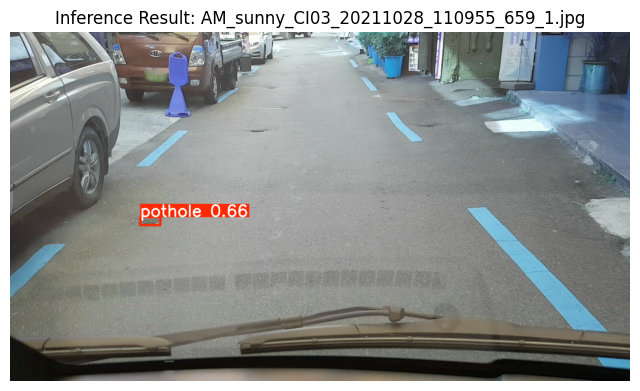

In [ ]:
model = YOLO("C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole_yolov8m_r1champ1024(new_train)2/weights/epoch130.pt")

TEST_IMAGE_DIR = "C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole-detection-challenge/SSAFY_AI_CHALLENGE/test/images"
test_image_paths = sorted(glob(os.path.join(TEST_IMAGE_DIR, "*.jpg")))
test_img_path = random.choice(test_image_paths)

results = model.predict(source=test_img_path, conf=0.25, imgsz=640, save=False)

result_img = results[0].plot()

plt.figure(figsize=(8, 6))
plt.imshow(result_img)
plt.axis("off")
plt.title(f"Inference Result: {os.path.basename(test_img_path)}")
plt.show()

In [84]:
import pandas as pd

results_csv_path = "C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole_yolov8m_r1champ1024(new_train)2/results.csv"

# CSV ÏùΩÍ∏∞
df = pd.read_csv(results_csv_path)

# Í∞ÄÏû• ÎÜíÏùÄ mAP50-95Î•º Í∞ÄÏßÑ row Ï∞æÍ∏∞
best_epoch = df["metrics/mAP50-95(B)"].idxmax()

print(f"üìå best.ptÎäî epoch {best_epoch}ÏóêÏÑú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")


üìå best.ptÎäî epoch 129ÏóêÏÑú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


## 10. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ± (submission.csv)
ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌï¥ ÌïôÏäµÎêú YOLO Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Í∞ùÏ≤¥ ÌÉêÏßÄÎ•º ÏàòÌñâÌïòÍ≥†,  
ÏòàÏ∏° Í≤∞Í≥ºÎ•º Ï†úÏ∂ú ÌòïÏãùÏóê ÎßûÏ∂∞ `submission.csv` ÌååÏùºÎ°ú Ï†ÄÏû•Ìï©ÎãàÎã§.

- Ìïú Ïù¥ÎØ∏ÏßÄÎãπ Î∞ïÏä§ ÌïòÎÇòÎßå Ï†úÏ∂úÌïòÎ©∞, confidenceÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ Î∞ïÏä§Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
- Í∞ùÏ≤¥Î•º Í∞êÏßÄÌïòÏßÄ Î™ªÌïú Í≤ΩÏö∞, `ClassId`ÏôÄ Î∞îÏö¥Îî© Î∞ïÏä§ Ï¢åÌëúÎäî Î™®Îëê 0ÏúºÎ°ú Ï≤òÎ¶¨Ìï©ÎãàÎã§.
- Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏÜêÏÉÅÎêòÏóàÍ±∞ÎÇò Ïó¥Î¶¨ÏßÄ ÏïäÎäî Í≤ΩÏö∞ÏóêÎèÑ ÏóêÎü¨ ÏóÜÏù¥ ÎÑòÏñ¥Í∞ÄÎèÑÎ°ù ÏòàÏô∏ Ï≤òÎ¶¨Î•º Ìè¨Ìï®Ìï©ÎãàÎã§.
- Output Í≤ΩÎ°úÏù∏ /kagggle/working/Ïóê Ï†ÄÏû•Îê©ÎãàÎã§.

In [ ]:
import pandas as pd

model = YOLO("C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole_yolov8m_r1champ1024(new_train)2/weights/epoch130.pt")

TEST_IMAGE_DIR = "C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/pothole-detection-challenge/SSAFY_AI_CHALLENGE/test/images"
test_image_paths = sorted(glob(os.path.join(TEST_IMAGE_DIR, "*.jpg")))

submission_rows = []

for img_path in test_image_paths:
    image_id = os.path.basename(img_path)

    if cv2.imread(img_path) is None:
        print(f"Ïù¥ÎØ∏ÏßÄ Î°úÎìú Ïã§Ìå®: {image_id}")
        submission_rows.append({
            "ImageId": image_id,
            "ClassId": 0,
            "X": 0,
            "Y": 0,
            "Width": 0,
            "Height": 0,
        })
        continue

    results = model.predict(source=img_path, conf=0.01, imgsz=1024, augment=True, save=False)
    result = results[0]

    if len(result.boxes) > 0:
        boxes = result.boxes
        best_idx = boxes.conf.argmax().item()
        cls_id = int(boxes.cls[best_idx].item())
        cx, cy, w, h = boxes.xywhn[best_idx].tolist()

        submission_rows.append({
            "ImageId": image_id,
            "ClassId": cls_id,
            "X": round(cx, 6),
            "Y": round(cy, 6),
            "Width": round(w, 6),
            "Height": round(h, 6),
        })
    else:
        submission_rows.append({
            "ImageId": image_id,
            "ClassId": 0,
            "X": 0,
            "Y": 0,
            "Width": 0,
            "Height": 0,
        })

submission_df = pd.DataFrame(submission_rows, columns=["ImageId", "ClassId", "X", "Y", "Width", "Height"])
submission_path = "C:/Users/Ï†ú2Í≥ºÌïôÍ≥º/Downloads/submission986.csv"
submission_df.to_csv(submission_path, index=False)
print(f"Ï†úÏ∂ú ÌååÏùº Ï†ÄÏû• ÏôÑÎ£å: {submission_path}")


image 1/1 C:\Users\2\Downloads\pothole-detection-challenge\SSAFY_AI_CHALLENGE\test\images\AM_sunny_CI01_20210916_105931_11_117_2.jpg: 576x1024 5 potholes, 164.5ms
Speed: 4.1ms preprocess, 164.5ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 1024)

image 1/1 C:\Users\2\Downloads\pothole-detection-challenge\SSAFY_AI_CHALLENGE\test\images\AM_sunny_CI01_20210916_105931_11_118_2.jpg: 576x1024 2 potholes, 23.1ms
Speed: 3.9ms preprocess, 23.1ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 1024)

image 1/1 C:\Users\2\Downloads\pothole-detection-challenge\SSAFY_AI_CHALLENGE\test\images\AM_sunny_CI01_20210916_105931_11_134_1.jpg: 576x1024 6 potholes, 23.2ms
Speed: 3.1ms preprocess, 23.2ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 1024)

image 1/1 C:\Users\2\Downloads\pothole-detection-challenge\SSAFY_AI_CHALLENGE\test\images\AM_sunny_CI01_20210916_105931_11_137_2.jpg: 576x1024 1 pothole, 20.1ms
Speed: 3.3ms preprocess, 20.1ms inference, 1.0ms post